In [2]:
from numpy import  cos, pi
import numpy as np
import matplotlib.pyplot as plt
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.periodic_functions import Cosine
from scipy.special import  jv
from scipy.linalg import eigh
import pandas as pd
import os
from pathlib import Path
from floquet_simulations.plot_functions import PlotParams, PlotAbsRealImagHamiltonian, PlotRealHamiltonian
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
PlotParams(fontsize=12)

## option 1 - 90 degree rotational symmetry


In [18]:
l_red = (0,0.5);r_red = np.sqrt(l_red[0]**2 + l_red[1]**2)
l_yel = (1,0.5);r_yel = np.sqrt(l_yel[0]**2 + l_yel[1]**2)
l_gre = (0,1.5);r_gre = np.sqrt(l_gre[0]**2 + l_gre[1]**2)
l_blu = (1,1.5);r_blu = np.sqrt(l_blu[0]**2 + l_blu[1]**2)

scale = 0.4
radii = np.array([r_red, r_yel, r_gre, r_blu])*scale
gradients = radii - radii[0]+ jv(0, 3.8316)
xvals = ComputeAValsFromRequiredGradients(gradients)

In [20]:
omega = 1
A1_red = xvals[0]*omega/2
A2_yelred = xvals[1]*omega - A1_red
A2_gre = xvals[2]*omega/2
A3_bluyelred = xvals[3]*omega - A2_yelred
A3_blugre = xvals[3]*omega - A2_gre
A1_yelgre = xvals[1]*omega - A2_gre

Avals1 = [A1_red, A2_yelred, A3_bluyelred]
Avals2 = [A1_red, A2_gre, A3_blugre]
Avals3 = [A1_yelgre, A2_gre, A3_blugre]

couples = [(0,0), (0,1), (1,1), (1,2)]
tunnellings = [[jv(0,(Avals[i] + Avals[j])/omega) for i,j in couples] for Avals in [Avals1, Avals2, Avals3]]
print(tunnellings)

[[-0.40275939321752835, -0.1555450307354284, 0.4392114597028585, 0.11835072696749332], [-0.40275939321752835, -0.29826007567906826, -0.002760217206570637, 0.11835072696749332], [-0.27646749740707743, -0.1555450307354284, -0.002760217206570637, 0.11835072696749332]]


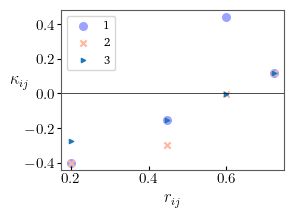

In [33]:
colour1 = "#FFB69C"
colour2= "#9BA2FF"
colour3 = "#"
fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii,tunnellings[0], marker = 'o', c=colour2, s = 30, label="1")
ax.scatter(radii,tunnellings[1], marker = 'x', c=colour1, s = 20, label="2")
ax.scatter(radii,tunnellings[2], marker = '>',  s = 9, label="3")

# ax.plot(r_axes, tunnellings_axes,c= colour_axes, label=r"$y=0$")

# ax.scatter(r_diagonal[:n_avals_plot-1], tunnellings_diagonal[:n_avals_plot-1], marker = 'x', c=colour_diagonal, s = 13)
# ax.scatter(r_axes, tunnellings_axes, marker = 'x', c=colour_axes, s = 13)

ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")

ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend(loc="upper left")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


array([[ 0., -1.,  0.,  0.],
       [-1.,  0., -1.,  0.],
       [ 0., -1.,  0., -1.],
       [ 0.,  0., -1.,  0.]])

## 5x5

In [50]:
# l_red = (0,0.5);r_red = np.sqrt(l_red[0]**2 + l_red[1]**2)
# l_ora = (1,0.5);r_ora = np.sqrt(l_ora[0]**2 + l_ora[1]**2)
# l_yel = (0,1.5);r_yel = np.sqrt(l_yel[0]**2 + l_yel[1]**2)
# l_gre = (1,1.5);r_gre = np.sqrt(l_gre[0]**2 + l_gre[1]**2)
# l_aqu = (2,0.5);r_aqu = np.sqrt(l_aqu[0]**2 + l_aqu[1]**2)
# l_blu = (2,1.5);r_blu = np.sqrt(l_blu[0]**2 + l_blu[1]**2)

In [51]:
link_indices = [(0,0.5), (1,0.5),(0,1.5), (1,1.5), (2,0.5), (2,1.5)]
r_vals = np.array([np.sqrt(x**2 + y**2) for (x,y) in link_indices])

In [61]:
scale = 0.5
radii = r_vals*scale
gradients = radii - radii[0]+ jv(0, 3.8316) +0.2
xvals = ComputeAValsFromRequiredGradients(gradients)
print(gradients)

[-0.20275939  0.1062576   0.29724061  0.44862843  0.57801701  0.79724061]


In [62]:
A1 = xvals[0]/2
A2 = -xvals[0]/2
A4 = xvals[1]+A2
A5 = -(xvals[3] - A4)
A6 = xvals[5] + A5
A3_ora = xvals[2] + A2
A3_aqa = xvals[4] + A5
Avals1 = [A1, A2, A3_ora, A4, A5, A6]
Avals2 = [A1, A2, A3_aqa, A4, A5, A6]

In [63]:
couples = [(0,1), (3,1), (2,1), (3,4), (2,4), (5,4)]
tunnellings = [[jv(0,(Avals[i] - Avals[j])) for i,j in couples] for Avals in [Avals1, Avals2]]

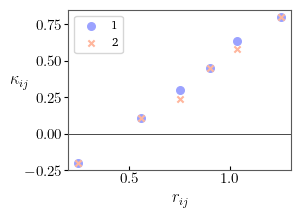

In [64]:
fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii,tunnellings[0], marker = 'o', c=colour2, s = 30, label="1")
ax.scatter(radii,tunnellings[1], marker = 'x', c=colour1, s = 20, label="2")

ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")

ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend(loc="upper left")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


In [65]:
tunnellings[0]

[-0.20275997465732187,
 0.10625803323847303,
 0.2972409043270414,
 0.44862869905749025,
 0.6315380383955597,
 0.797239953606068]